In [2]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv("task_1_1.csv")

# Display first 4 rows
print(df.head(4))

   block_size  search_window_size estimation_type error_function    OF_MSEN  \
0          72                  88         forward            mae  48.005199   
1          60                  80        backward        nccoeff   2.529502   
2          20                  40        backward         nccorr   3.879557   
3          24                  88        backward        nccoeff   2.786128   

      OF_PEPN      time  
0  100.000000  6.030350  
1   20.756254  0.056367  
2   20.955622  0.053233  
3   16.526407  0.148000  


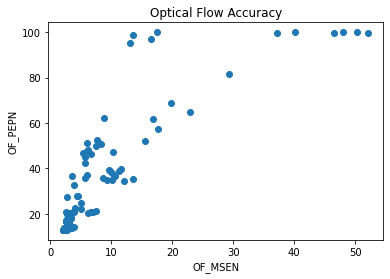

In [4]:
import matplotlib.pyplot as plt

# Create scatter plot of OF_MSEN vs. OF_PEPN
plt.scatter(df['OF_MSEN'], df['OF_PEPN'])
plt.xlabel('OF_MSEN')
plt.ylabel('OF_PEPN')
plt.title('Optical Flow Accuracy')
plt.show()

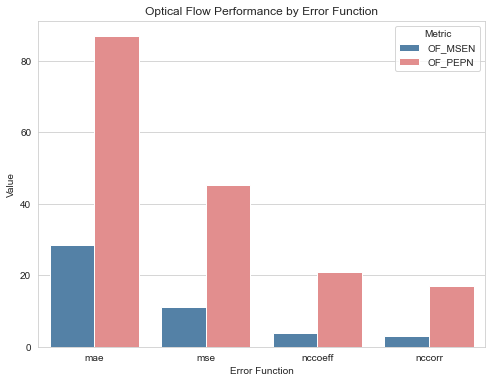

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by error function and calculate the mean MSEN and PEPN values for each group
grouped = df.groupby(['error_function']).mean()[['OF_MSEN', 'OF_PEPN']].reset_index()

# Reshape the data so that MSEN and PEPN values are combined into a single column
grouped_melt = pd.melt(grouped, id_vars=['error_function'], value_vars=['OF_MSEN', 'OF_PEPN'],
                       var_name='metric', value_name='accuracy')

# Set the style of the plot
sns.set_style('whitegrid')

# Set the figure size and create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='error_function', y='accuracy', hue='metric', data=grouped_melt, palette=['steelblue', 'lightcoral'], ax=ax)

# Customize the axis labels, title, and legend
ax.set_xlabel('Error Function')
ax.set_ylabel('Value')
ax.set_title('Optical Flow Performance by Error Function')
ax.legend(title='Metric')

plt.show()


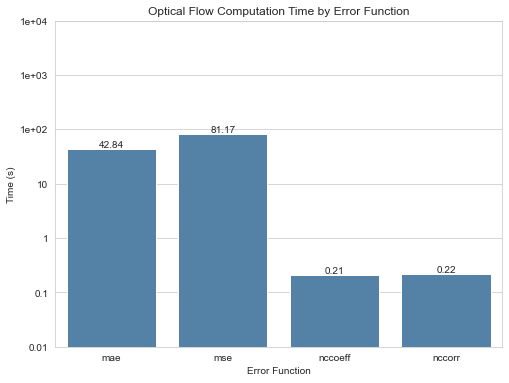

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Group the data by error function and calculate the mean time value for each group
grouped = df.groupby(['error_function']).mean()[['time']].reset_index()

# Set the style of the plot
sns.set_style('whitegrid')

# Set the figure size and create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='error_function', y='time', data=grouped, color='steelblue', ax=ax)

# Set the y-axis scale to logarithmic to compress the values
ax.set_yscale('log')

# Customize the axis labels, title, and legend
ax.set_xlabel('Error Function')
ax.set_ylabel('Time (s)')
ax.set_title('Optical Flow Computation Time by Error Function')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            ha='center', va='bottom')

# Set the y-axis ticks and labels
ticks = np.logspace(-2, 4, num=7)
ax.set_yticks(ticks)
ax.set_yticklabels(['{:.2g}'.format(t) for t in ticks])

plt.show()


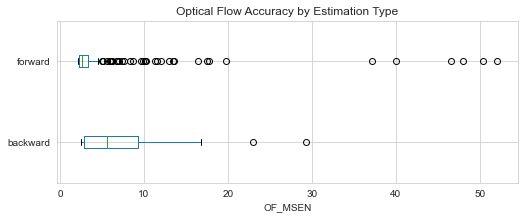

In [24]:
import matplotlib.pyplot as plt

# Set the figure size and adjust the subplot spacing
fig, ax = plt.subplots(figsize=(8, 3))
plt.subplots_adjust(left=0.15, right=0.95, bottom=1, top=2, wspace=1, hspace=1)

# Create boxplot of OF_MSEN by estimation type
df.boxplot(column='OF_MSEN', by='estimation_type', vert=False, ax=ax)

# Customize the axis labels and title
plt.xlabel('OF_MSEN')
plt.title('Optical Flow Accuracy by Estimation Type')
plt.suptitle("")

plt.show()


d:\Programas\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


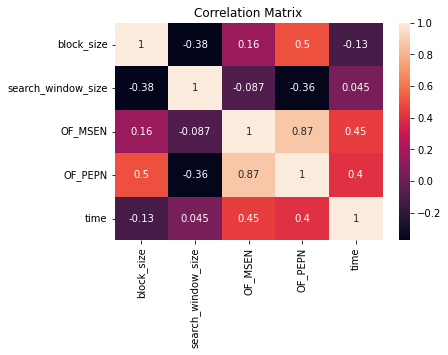

In [7]:
import seaborn as sns

# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

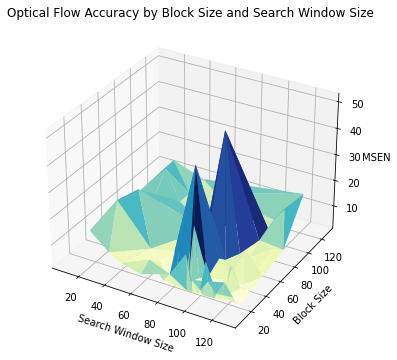

In [8]:
import numpy as np

# Pivot the DataFrame to create a matrix where each row represents a block size, each column represents a search window size,
# and the values are the MSEN values
df_wo_duplicates = df.drop_duplicates(subset=['block_size', 'search_window_size'])
# msen_matrix = df_wo_duplicates.pivot(index='block_size', columns='search_window_size', values='OF_MSEN')

# Create 3D plot of MSEN values by block size and search window size
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df['search_window_size'], df['block_size'], df['OF_MSEN'], cmap='YlGnBu', edgecolor='none')

# Customize the axis labels and title
ax.set_xlabel('Search Window Size')
ax.set_ylabel('Block Size')
ax.set_zlabel('MSEN')
ax.set_title('Optical Flow Accuracy by Block Size and Search Window Size')

plt.show()


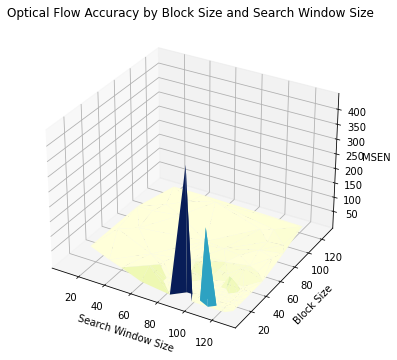

In [9]:
# Pivot the DataFrame to create a matrix where each row represents a block size, each column represents a search window size,
# and the values are the MSEN values
df_wo_duplicates = df.drop_duplicates(subset=['block_size', 'search_window_size'])
# msen_matrix = df_wo_duplicates.pivot(index='block_size', columns='search_window_size', values='OF_MSEN')

# Create 3D plot of MSEN values by block size and search window size
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df['search_window_size'], df['block_size'], df['time'], cmap='YlGnBu', edgecolor='none')

# Customize the axis labels and title
ax.set_xlabel('Search Window Size')
ax.set_ylabel('Block Size')
ax.set_zlabel('MSEN')
ax.set_title('Optical Flow Accuracy by Block Size and Search Window Size')

plt.show()


In [4]:
import optuna
import os

os.makedirs('optuna', exist_ok=True)

# Load the study
optuna_study_name = 'task_1_2_1_optuna_study'
study = optuna.load_study(
    # study_name="no-name-b67b298f-d4e9-4177-b546-8b6158efe1c8", 
    study_name=optuna_study_name,
    storage="sqlite:///{}.db".format(optuna_study_name), 
    )

# Print the best parameters for every objective
print('Best parameters for each objective:')
for i in range(len(study.best_params)):
    print('Objective {}: {}'.format(i, study.best_params[i]))

Best parameters for each objective:


RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [5]:
# Make the plot more narrow
from matplotlib import pyplot as plt

fig = optuna.visualization.plot_contour(
    study, params=['search_window_size', 'block_size'])
fig.update_layout(
    autosize=False,
    width=900,
    height=800,
)
fig.write_image('./optuna/contour.png')
fig


In [7]:
optuna.visualization.plot_param_importances(study)

### Task 1.2.2

In [17]:
methods = ['Bl. Match. \n No post.', 'Bl. Match. \n With post.', 'PyFlow', 'MaskFlownet', 'Unimatch',]
msen = [2.16, 1.06, 1.00, 0.29, 0.39]
pepn = [13.07, 7.03, 8.23, 0.76, 0.52]
temps = [0.127, 0.492, 23.52, 0.74, 0.33]

# arrange the data into a dataframe
df = pd.DataFrame({'Method': methods, 'MSEN': msen, 'PEPN': pepn, 'Time (s)': temps})
df.head(4)

,Method,MSEN,PEPN,Time (s)
0,Bl. Match. \n No post.,2.16,13.07,0.127
1,Bl. Match. \n With post.,1.06,7.03,0.492
2,PyFlow,1.00,8.23,23.520
3,MaskFlownet,0.29,0.76,0.740


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Group the data by error function and calculate the mean MSEN and PEPN values for each group
# grouped = df.groupby(['error_function']).mean()[['OF_MSEN', 'OF_PEPN']].reset_index()

# Reshape the data so that MSEN and PEPN values are combined into a single column
# grouped_melt = pd.melt(grouped, id_vars=['error_function'], value_vars=['OF_MSEN', 'OF_PEPN'],
#                        var_name='metric', value_name='accuracy')
grouped_melt = pd.melt(df, id_vars=['Method'], value_vars=['MSEN', 'PEPN'],
                       var_name='metric', value_name='accuracy')
grouped_melt

,Method,metric,accuracy
0,Bl. Match. \n No post.,MSEN,2.16
1,Bl. Match. \n With post.,MSEN,1.06
2,PyFlow,MSEN,1.00
3,MaskFlownet,MSEN,0.29
4,Unimatch,MSEN,0.39
5,Bl. Match. \n No post.,PEPN,13.07
6,Bl. Match. \n With post.,PEPN,7.03
7,PyFlow,PEPN,8.23
8,MaskFlownet,PEPN,0.76
9,Unimatch,PEPN,0.52


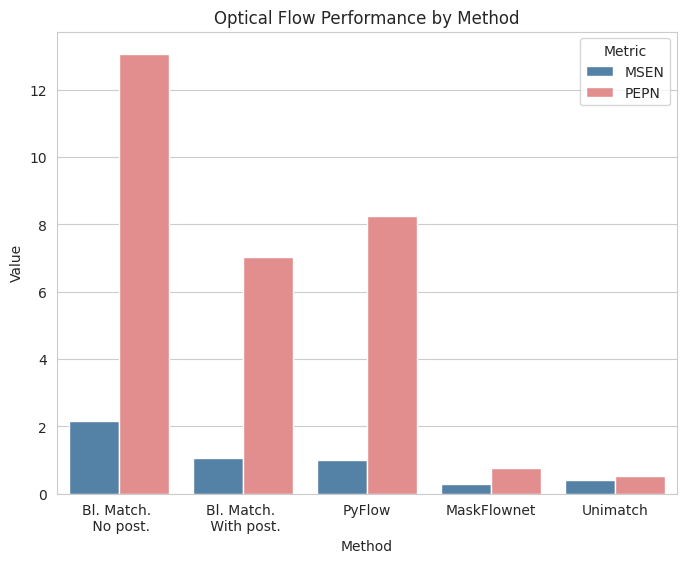

In [28]:
# Set the style of the plot
sns.set_style('whitegrid')

# Set the figure size and create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Method', y='accuracy', hue='metric', data=grouped_melt, palette=['steelblue', 'lightcoral'], ax=ax)

# Customize the axis labels, title, and legend
ax.set_xlabel('Method')
ax.set_ylabel('Value')
ax.set_title('Optical Flow Performance by Method')
ax.legend(title='Metric')

plt.show()

/tmp/ipykernel_33661/2731425759.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 80])


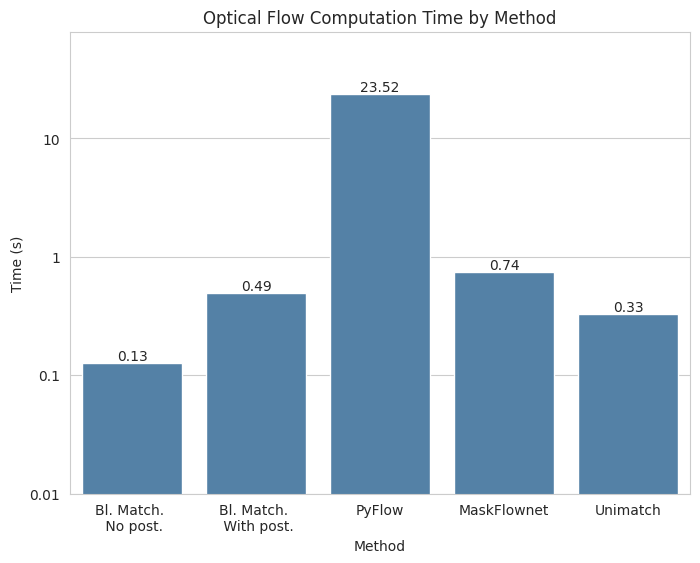

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Group the data by error function and calculate the mean time value for each group
# grouped = df.groupby(['error_function']).mean()[['time']].reset_index()

# Set the style of the plot
sns.set_style('whitegrid')

# Set the figure size and create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Method', y='Time (s)', data=df, color='steelblue', ax=ax)

# Set the y-axis scale to logarithmic to compress the values
ax.set_yscale('log')

# Customize the axis labels, title, and legend
ax.set_xlabel('Method')
ax.set_ylabel('Time (s)')
ax.set_title('Optical Flow Computation Time by Method')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            ha='center', va='bottom')

# Set the y-axis ticks and labels
ticks = np.logspace(-2, 4, num=7)
ax.set_yticks(ticks)
ax.set_yticklabels(['{:.2g}'.format(t) for t in ticks])
plt.ylim([0, 80])

plt.show()